# LIFE EXPECTANCY PROJECT FROM KAGGLE

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [85]:
df_original = pd.read_csv('Life Expectancy Data.csv')

In [86]:
df_original.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [87]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Working on Missing Values

In [98]:
# missing data
total = df_original.isnull().sum().sort_values(ascending=False)
percent = (df_original.isnull().sum()/df_original.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Population,652,0.221920
Hepatitis B,553,0.188223
GDP,448,0.152485
Total expenditure,226,0.076923
Alcohol,194,0.066031
Income composition of resources,167,0.056841
Schooling,163,0.055480
thinness 5-9 years,34,0.011572
thinness 1-19 years,34,0.011572
BMI,34,0.011572


In [99]:
df_original.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [100]:
df_new = df_original.copy()

In [101]:
df_new.dropna(subset = ['Life expectancy '], inplace=True)

In [102]:
df_new['Life expectancy '].isnull().sum()

0

In [ ]:
df_new.dropna(subset = ['Life expectancy '], inplace=True)

#### South Sudan is missing a significant amount of data related to immunization factor, therefore all observations for this country will be removed from dataset.

In [115]:
#df_new[df_new['Country']== 'South Sudan'].isnull().sum()

In [111]:
df_new = df_new[df_new['Country'] != 'South Sudan']

In [163]:
#df_new[df_new['Country']=='Montenegro']

#### To delete rows that meet two conditions.

In [161]:
# To delete rows that meet two conditions.
# To get a list of indices for rows meeting certain conditions. 
# The resulting list is used in the drop method.
row_index_delete = []
for row in df_new.itertuples():
    #print(row[2])
    if (row[1] == 'Montenegro') & (row[2] <= 2005):
        print('hi')
        row_index_delete.append(row[0])
        #print(row_index_delete)

In [162]:
df_new.drop(row_index_delete, axis=0, inplace=True)

In [171]:
df_new.drop(df_new[df_new['Polio'].isnull()].index, axis=0, inplace=True)

In [180]:
#df_new.isnull().sum()

#### Dropping columns Population and GDP as its correlation with life expentacy is lower than 0.5. The missing values for those columns could have been pulled from the web.

In [201]:
df_new.drop(['GDP'], axis = 1, inplace = True)

In [302]:
df_new.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

#### Hepatitis nan replacement

In [220]:
# This works for those countries with some data in Hepatitis column
df_new['Hepatitis B'] = df_new['Hepatitis B'].fillna(df_new.groupby('Country')['Hepatitis B'].transform('mean'))

In [256]:
#df_new[df_new['Hepatitis B'].isnull()].groupby('Country').agg(Hepatitis = ('Hepatitis B', 'count')).reset_index()

In [257]:
# There were 8 countries with no info in Hepatitis column
df_new['Hepatitis B'] = df_new['Hepatitis B'].replace({np.nan : 0})

#### Alcohol

In [272]:
df_new.dropna(subset=['Alcohol', ' BMI ', 'Total expenditure'], inplace=True)

In [274]:
df_new.shape

(2676, 20)

#### Dropping 120 rows of missing Schooling data

In [300]:
df_new[df_new['Schooling'].isnull()].groupby('Country')[['Country','Schooling']].count()

,Country,Schooling
Country,,
Czechia,15,0
Côte d'Ivoire,15,0
Democratic Republic of the Congo,15,0
Republic of Korea,15,0
Republic of Moldova,15,0
United Kingdom of Great Britain and Northern Ireland,15,0
United Republic of Tanzania,15,0
United States of America,15,0


In [301]:
df_new.dropna(subset=['Schooling'], inplace=True)

### 1) Does various predicting factors which has been chosen initially really affect the Life expectancy? What are the predicting variables actually affecting the life expectancy? 

(array([  1.,   3.,   6.,  44.,  56.,  78., 104., 125., 177., 100., 184.,
        221., 209., 371., 540., 279., 202., 160.,  38.,  30.]),
 array([36.3  , 38.935, 41.57 , 44.205, 46.84 , 49.475, 52.11 , 54.745,
        57.38 , 60.015, 62.65 , 65.285, 67.92 , 70.555, 73.19 , 75.825,
        78.46 , 81.095, 83.73 , 86.365, 89.   ]),
 <BarContainer object of 20 artists>)

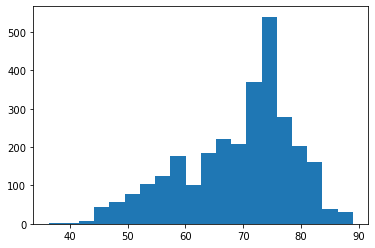

In [19]:
#Life Expectancy
plt.hist(df.iloc[:,3], bins = 20)
#plt.xticks(0,90])

<AxesSubplot:>

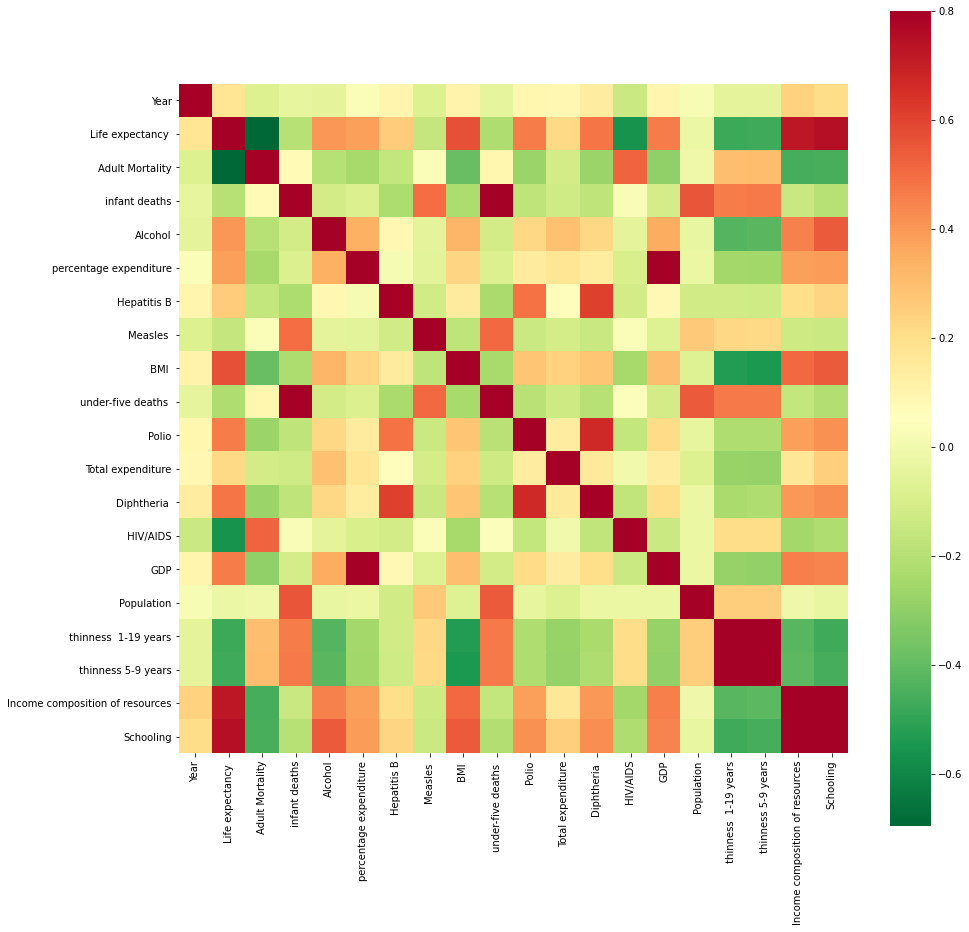

In [191]:
#correlation matrix
corrmat = df_original.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=0.8, square=True,cmap="RdYlGn_r")

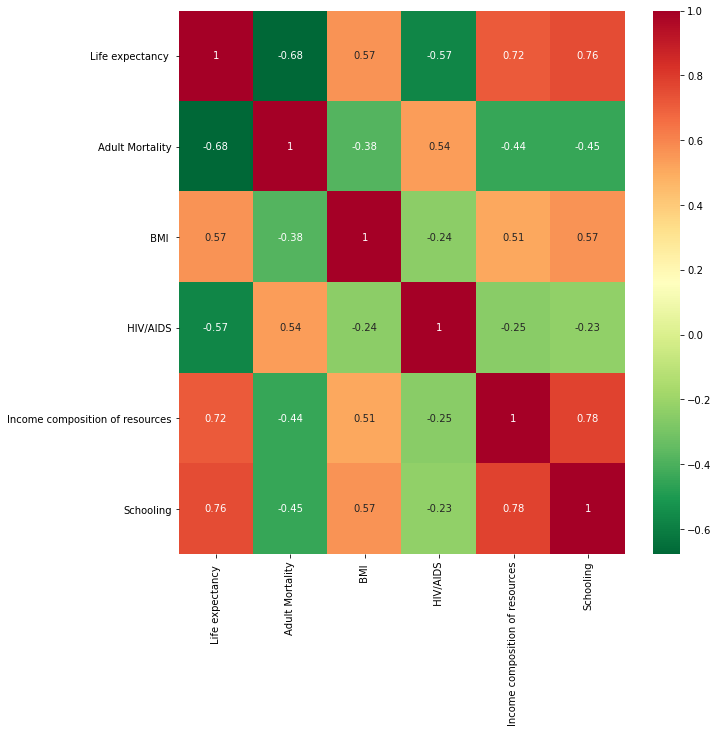

In [303]:
# most correlated features with life expectancy
corrmat = df_new.corr()
top_corr_features = corrmat.index[abs(corrmat["Life expectancy "])>0.4]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_new[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

Text(0, 0.5, 'Life expectancy ')

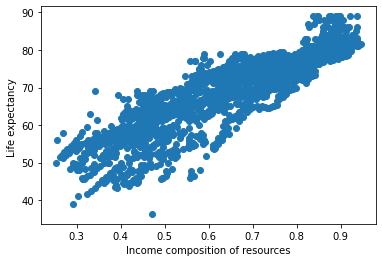

In [318]:
plt.scatter(df_new['Income composition of resources'], df_new['Life expectancy '])
plt.xlabel('Income composition of resources')
plt.ylabel('Life expectancy ')

In [ ]:
#

In [316]:
Income_outliers_indeces = df_new[df_new['Income composition of resources'] == 0].index

In [317]:
df_new.drop(Income_outliers_indeces, axis=0, inplace=True)

In [ ]:
sns.pairplot(tips, hue = 'sex')
plt.show()